# **Problema 1 - Word Cloud:**

Descargue el Dataset el cual contiene aproximadamente 800,000
tweets de diversos temas.

Usando CoLab y expresiones regulares. Determine los 3 usuarios m ás populares dentro del dataset. Luego arme un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:

*   Content: Tweet.
*   Metadata: ID, Timestamp, Length (este valor hay que calcularlo).

esto es necesario que extraiga el contexto de cada tweet y verifique cuales son las palabras que m
Posterior a tener sus 3 corpus creados, responda: ¿Razón por la que citan a ese usuario? para esto es necesario que extraiga el contexto de cada tweet y verifique cuales son las palabras que más rodean al nombre de usuario. Para extraer un contexto valido y debido a la naturaleza del tipo de datos que están disponibles en nuestro dataset le recomendamos seguir los siguientes pasos:
1. Remover stopwords.
2. Realizar stemming y lemmatización.
3. Mostrar un WordCloud con el top 10 para cada usuario

## **Cargar el Dataset TW_Source.csv**

In [2]:
# Pasos para acceder al archivo desde Google Drive
from google.colab import drive
import pandas as pd

# Montar Google Drive a Colab
drive.mount('/content/drive')

# Cargar el archivo CSV desde Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/tw_source.csv'
df = pd.read_csv(file_path, header=None, names=['sentiment', 'id', 'date', 'query', 'user', 'tweet'], encoding='latin-1')  # Added encoding='latin-1' to handle different encoding

# Primeras filas del dataframe
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## **Determinar los 3 usuarios más populares dentro del dataset**

In [6]:
import re
from collections import Counter

# Usar expresiones regulares para encontrar todas las menciones de usuarios (@username) en los tweets
def find_mentions(tweet):
    # Encuentra menciones que empiezan con '@' seguidas de cualquier palabra
    return re.findall(r'@\w+', tweet)

# Aplicar la función para extraer las menciones de cada tweet
df['mentions'] = df['tweet'].apply(find_mentions)

# Crear una lista de todas las menciones
all_mentions = [mention for mentions in df['mentions'] for mention in mentions]

# Contar las menciones de usuarios
mention_counts = Counter(all_mentions)

# Obtener los 3 usuarios más populares (más mencionados)
top_3_users = mention_counts.most_common(3)

# Mostrar los 3 usuarios más populares
print("Los 3 usuarios más populares son:")
print(top_3_users)

Los 3 usuarios más populares son:
[('@mileycyrus', 4500), ('@tommcfly', 3887), ('@ddlovato', 3467)]


## **Armar un corpus el cual contenga los siguientes elementos por cada usuario seleccio**

In [7]:
# Lista de los 3 usuarios más mencionados (del resultado anterior)
top_users = ['@mileycyrus', '@tommcfly', '@ddlovato']

# Función para crear un corpus de tweets para un usuario dado
def create_corpus_for_user(user, df):
    # Filtrar tweets que mencionan al usuario
    user_tweets = df[df['tweet'].str.contains(user, case=False, na=False)]

    # Crear un DataFrame con el tweet y los metadatos: ID, Timestamp, y Length (calculado)
    corpus = pd.DataFrame({
        'tweet': user_tweets['tweet'],
        'id': user_tweets['id'],
        'timestamp': user_tweets['date'],
        'length': user_tweets['tweet'].apply(len)  # Calcular la longitud del tweet
    })

    return corpus

In [8]:
# Crear un corpus para cada uno de los 3 usuarios más mencionados
corpus = {}
for user in top_users:
    corpus[user] = create_corpus_for_user(user, df)

In [9]:
# Corpus para @mileycyrus
corpus['@mileycyrus'].head()

,tweet,id,timestamp,length
1021,@mileycyrus hahaha dont be like that one time ...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107
2014,"@mileycyrus i have the same problem, but it's ...",1468286517,Tue Apr 07 00:45:20 PDT 2009,137
2073,@mileycyrus I guess counting sheep didn't work...,1468297110,Tue Apr 07 00:49:07 PDT 2009,72
2080,@mileycyrus I would too if it meant spending a...,1468298918,Tue Apr 07 00:49:44 PDT 2009,100
2156,@mileycyrus AWWW u seriously have the cutest d...,1468318249,Tue Apr 07 00:56:41 PDT 2009,112


In [10]:
# Corpus para @tommcfly
corpus['@tommcfly'].head()

,tweet,id,timestamp,length
1690,@tommcfly hey saw u guys play @ pushover..didn...,1468210813,Tue Apr 07 00:19:09 PDT 2009,138
1789,@tommcfly Good morning Tom! Why can't I send y...,1468233211,Tue Apr 07 00:26:52 PDT 2009,131
2514,@tommcfly did you know that johnsons baby use ...,1468391638,Tue Apr 07 01:23:07 PDT 2009,96
3029,"@dougiemcfly @tommcfly good morning guys, how ...",1468502040,Tue Apr 07 02:03:41 PDT 2009,108
3524,"@tommcfly hey, no chance of adding brighton or...",1468618787,Tue Apr 07 02:46:02 PDT 2009,131


In [11]:
# Corpus para @ddlovato
corpus['@ddlovato'].head()

,tweet,id,timestamp,length
460,@ddlovato @David_Henrie ummmmm i cant find it.,1467929230,Mon Apr 06 22:51:34 PDT 2009,47
573,@ddlovato Do you hate us?? Please don't,1467953367,Mon Apr 06 22:58:30 PDT 2009,40
7032,@ddlovato Wish that i could see it.. Thats th...,1469661950,Tue Apr 07 07:02:58 PDT 2009,96
7089,"@ddlovato hey demi, wen are you and selena gon...",1469674492,Tue Apr 07 07:05:11 PDT 2009,79
8611,@ddlovato ahhhh i wish i could go to the dalla...,1548280868,Fri Apr 17 20:31:31 PDT 2009,85


In [12]:
# Imprimir los resultados de los 3 usuarios más mencionados
for user in top_users:
    print(f"Corpus para el usuario: {user}")
    print(corpus[user].head())
    print("\n" + "-"*80 + "\n")

Corpus para el usuario: @mileycyrus
                                                  tweet          id  \
1021  @mileycyrus hahaha dont be like that one time ...  1468063101   
2014  @mileycyrus i have the same problem, but it's ...  1468286517   
2073  @mileycyrus I guess counting sheep didn't work...  1468297110   
2080  @mileycyrus I would too if it meant spending a...  1468298918   
2156  @mileycyrus AWWW u seriously have the cutest d...  1468318249   

                         timestamp  length  
1021  Mon Apr 06 23:30:57 PDT 2009     107  
2014  Tue Apr 07 00:45:20 PDT 2009     137  
2073  Tue Apr 07 00:49:07 PDT 2009      72  
2080  Tue Apr 07 00:49:44 PDT 2009     100  
2156  Tue Apr 07 00:56:41 PDT 2009     112  

--------------------------------------------------------------------------------

Corpus para el usuario: @tommcfly
                                                  tweet          id  \
1690  @tommcfly hey saw u guys play @ pushover..didn...  1468210813   
1789  @t

## **¿Razón por la que citan a este usuario?**

In [18]:
import nltk
import collections
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Remover stopwords y realizar stemming y lemmatización.

*   Creación de estadísticas para verificación de ambos procesos

In [19]:
# Inicializar el lematizador, el stemmer y las stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Función para limpiar texto (remover menciones, links, etc.), aplicar stemming y lematización
def clean_and_process_text(text, return_tokens=False):
    # Remover menciones y URLs
    text = re.sub(r'@\w+', '', text)  # Remover menciones
    text = re.sub(r'http\S+', '', text)  # Remover URLs

    # Tokenizar el texto
    tokens = text.split()

    # Contar las stopwords eliminadas
    removed_stopwords = [word for word in tokens if word.lower() in stop_words]
    removed_count = len(removed_stopwords)

    # Remover stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Aplicar stemming y lematización
    processed_tokens = [lemmatizer.lemmatize(stemmer.stem(word.lower())) for word in tokens]

    # Contar palabras después de lematización y stemming
    processed_counts = collections.Counter(processed_tokens)

    return removed_count, processed_counts

# Función para obtener las palabras más repetidas
def get_most_frequent_words(corpus, top_n=10):
    all_processed_words = []
    total_removed = 0  # Contador para el total de palabras eliminadas
    all_processed_counts = collections.Counter()  # Contador para el total de palabras procesadas

    # Procesar y limpiar todos los tweets
    for tweet in corpus['tweet']:
        removed_count, processed_counts = clean_and_process_text(tweet)
        total_removed += removed_count
        all_processed_words.extend(processed_counts.keys())
        all_processed_counts.update(processed_counts)  # Actualizar el contador total

    # Mostrar total de stopwords eliminadas
    print(f"\nTotal de stopwords eliminadas: {total_removed}")

    # Mostrar las palabras más frecuentes
    print(f"\nLas {top_n} palabras más frecuentes después de limpiar el corpus:\n")
    for word, count in all_processed_counts.most_common(top_n):
        print(f"{word}: {count}")

    # Mostrar el top 20 de palabras después de lematización y stemming
    print("\nTop 20 palabras después de lematización y stemming:\n")
    for word, count in all_processed_counts.most_common(20):
        print(f"{word}: {count}")

# Imprimir los resultados para los 3 usuarios más mencionados
for user in top_users:
    print(f"Resultados para {user}:")
    get_most_frequent_words(corpus[user])
    print("\n" + "-"*80 + "\n")  # Separador para mejor legibilidad

Resultados para @mileycyrus:

Total de stopwords eliminadas: 25303

Las 10 palabras más frecuentes después de limpiar el corpus:

love: 925
u: 632
-: 538
miley: 494
vote: 426
come: 319
i'm: 315
hope: 305
good: 303
go: 277

Top 20 palabras después de lematización y stemming:

love: 925
u: 632
-: 538
miley: 494
vote: 426
come: 319
i'm: 315
hope: 305
good: 303
go: 277
im: 267
plea: 254
like: 252
see: 251
want: 204
realli: 195
get: 193
ur: 178
movi: 170
know: 168

--------------------------------------------------------------------------------

Resultados para @tommcfly:

Total de stopwords eliminadas: 22580

Las 10 palabras más frecuentes después de limpiar el corpus:

love: 480
u: 383
come: 337
plea: 330
i'm: 320
say: 306
xx: 303
tom: 286
x: 257
good: 245

Top 20 palabras después de lematización y stemming:

love: 480
u: 383
come: 337
plea: 330
i'm: 320
say: 306
xx: 303
tom: 286
x: 257
good: 245
like: 244
go: 238
guy: 236
back: 234
see: 221
get: 219
plz: 218
repli: 217
miss: 205
haha: 18

### Mostrar un WordCloud con el top 10 para cada usuario.

Generando WordCloud para @mileycyrus


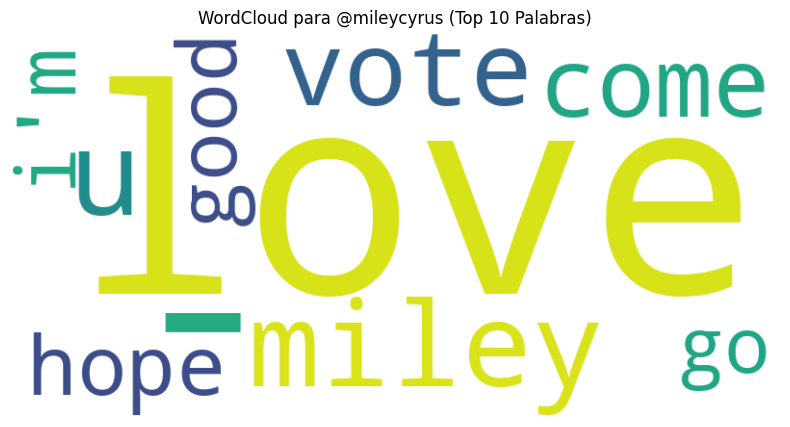

Generando WordCloud para @tommcfly


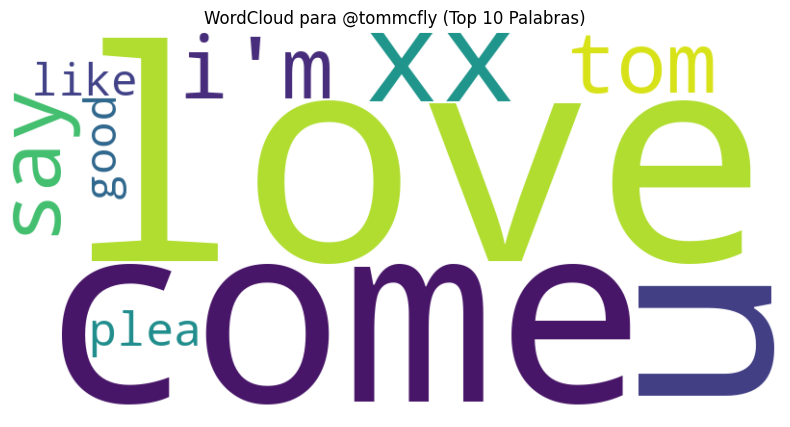

Generando WordCloud para @ddlovato


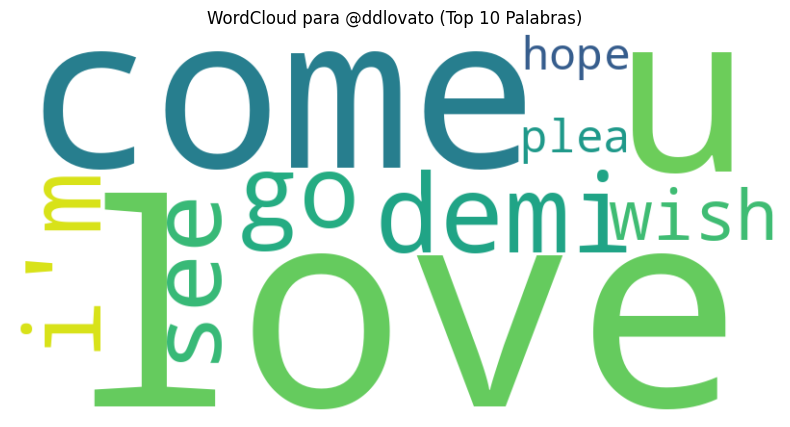

In [20]:
# Función para generar un wordcloud con el top 10 de palabras más frecuentes
def generate_wordcloud(user, corpus):
    # Limpiar y procesar todos los tweets del corpus
    all_processed_words = []

    for tweet in corpus['tweet']:
        _, processed_counts = clean_and_process_text(tweet)
        all_processed_words.extend(processed_counts)  # Obtener solo las palabras procesadas

    # Contar la frecuencia de las palabras
    word_counts = collections.Counter(all_processed_words)

    # Seleccionar solo las 10 palabras más frecuentes
    top_10_words = dict(word_counts.most_common(10))

    # Generar el wordcloud solo con las palabras del top 10
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_words)

    # Mostrar el wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud para {user} (Top 10 Palabras)")
    plt.show()

# Generar wordclouds para los 3 usuarios más mencionados
for user in top_users:
    print(f"Generando WordCloud para {user}")
    generate_wordcloud(user, corpus[user])